In [1]:
!pip install -U polars

In [1]:
import numpy as np
import polars as pl
import pandas as pd

In [2]:
pl.__version__

'0.19.3'

##DATA

In [3]:
import urllib.request
import zipfile
import os

def download_and_unzip(url, extract_to='.'):
    zip_path, _ = urllib.request.urlretrieve(url)
    with zipfile.ZipFile(zip_path) as zip_ref:
        zip_ref.extractall(extract_to)
    os.remove(zip_path)
    
url ='https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
download_and_unzip(url)

In [4]:
autos = pl.read_csv('vehicles.csv', null_values=['NA'])

In [88]:
autos

barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,…,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
f64,f64,f64,f64,i64,f64,i64,f64,f64,f64,f64,i64,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,i64,f64,str,i64,str,i64,i64,i64,str,str,i64,i64,i64,f64,i64,…,str,str,str,bool,i64,i64,i64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,i64,i64,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,i64,i64,i64
15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4,2.0,"""Rear-Wheel Dri…",9011,"""(FFS)""",-1,2000,0,"""Regular""","""Regular Gasoli…",-1,-1,25,0.0,0,…,"""Alfa Romeo""","""Spider Veloce …","""Y""",false,0,0,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",23.3333,0.0,35.0,0.0,"""Two Seaters""",1985,-2250,null,null,null,null,null,null,null,null,null,null,0.0,null,"""Tue Jan 01 00:…","""Tue Jan 01 00:…",null,0,0,0
29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12,4.9,"""Rear-Wheel Dri…",22020,"""(GUZZLER)""",-1,3850,0,"""Regular""","""Regular Gasoli…",-1,-1,14,0.0,0,…,"""Ferrari""","""Testarossa""","""N""",false,0,0,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",11.0,0.0,19.0,0.0,"""Two Seaters""",1985,-11500,"""T""",null,null,null,null,null,null,null,null,null,0.0,null,"""Tue Jan 01 00:…","""Tue Jan 01 00:…",null,0,0,0
12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4,2.2,"""Front-Wheel Dr…",2100,"""(FFS)""",-1,1550,0,"""Regular""","""Regular Gasoli…",-1,-1,33,0.0,0,…,"""Dodge""","""Charger""","""Y""",false,0,0,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",29.0,0.0,47.0,0.0,"""Subcompact Car…",1985,0,null,"""SIL""",null,null,null,null,null,null,null,null,0.0,null,"""Tue Jan 01 00:…","""Tue Jan 01 00:…",null,0,0,0
29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8,5.2,"""Rear-Wheel Dri…",2850,null,-1,3850,0,"""Regular""","""Regular Gasoli…",-1,-1,12,0.0,0,…,"""Dodge""","""B150/B250 Wago…","""N""",false,0,0,0,0.0,0.0,0.0,0.0,"""Automatic 3-sp…",12.2222,0.0,16.6667,0.0,"""Vans""",1985,-11500,null,null,null,null,null,null,null,null,null,null,0.0,null,"""Tue Jan 01 00:…","""Tue Jan 01 00:…",null,0,0,0
17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4,2.2,"""4-Wheel or All…",66031,"""(FFS,TRBO)""",-1,2700,0,"""Premium""","""Premium Gasoli…",-1,-1,23,0.0,0,…,"""Subaru""","""Legacy AWD Tur…","""N""",false,0,90,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",21.0,0.0,32.0,0.0,"""Compact Cars""",1993,-5750,null,null,"""T""",null,null,null,null,null,null,null,0.0,null,"""Tue Jan 01 00:…","""Tue Jan 01 00:…",null,0,0,0
14.982273,0.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,4,1.8,"""Front-Wheel Dr…",66020,"""(FFS)""",-1,1900,0,"""Regular""","""Regular Gasoli…",-1,-1,24,0.0,0,…,"""Subaru""","""Loyale""","""N""",false,0,88,0,0.0,0.0,0.0,0.0,"""Automatic 3-sp…",27.0,0.0,33.0,0.0,"""Compact Cars""",1993,-1750,null,null,null,null,null,null,null,null,null,null,0.0,null,"""Tue Jan 01 00:…","""Tue Jan 01 00:…",null,0,0,0
13.1844,0.0,0.0,0.0,22,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,355.48,25,0.0,0,0.0,0.0,0.0,0.0,4,1.8,"""Front-Wheel Dr…",66020,"""(FFS)""",-1,1700,0,"""Regular""","""Regular Gasoli…",-1,-1,29,0.0,0,…,"""Subaru""","""Loyale""","""Y""",false,0,88,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",28.0,0.0,41.0,0.0,"""Compact Cars""",1993,-750,null,null,null,null,null,null,null,null,null,null,0.0,null,"""Tue Jan 0

In [5]:
autos.columns

['barrels08',
 'barrelsA08',
 'charge120',
 'charge240',
 'city08',
 'city08U',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2',
 'co2A',
 'co2TailpipeAGpm',
 'co2TailpipeGpm',
 'comb08',
 'comb08U',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'cylinders',
 'displ',
 'drive',
 'engId',
 'eng_dscr',
 'feScore',
 'fuelCost08',
 'fuelCostA08',
 'fuelType',
 'fuelType1',
 'ghgScore',
 'ghgScoreA',
 'highway08',
 'highway08U',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'hlv',
 'hpv',
 'id',
 'lv2',
 'lv4',
 'make',
 'model',
 'mpgData',
 'phevBlended',
 'pv2',
 'pv4',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'trany',
 'UCity',
 'UCityA',
 'UHighway',
 'UHighwayA',
 'VClass',
 'year',
 'youSaveSpend',
 'guzzler',
 'trans_dscr',
 'tCharger',
 'sCharger',
 'atvType',
 'fuelType2',
 'rangeA',
 'evMotor',
 'mfrCode',
 'c240Dscr',
 'charge240b',
 'c240bDscr',
 'createdOn',
 'modifiedOn',
 'startStop',
 '

In [6]:
autos.estimated_size()

33524441

##TYPES getting the right types will enable analysis and correctness

In [7]:
cols = ['city08','comb08','highway08','cylinders','displ','drive','eng_dscr','fuelCost08','make','model',
       'trany','range','createdOn','year']

In [8]:
autos[cols].dtypes

[Int64,
 Int64,
 Int64,
 Int64,
 Float64,
 Utf8,
 Utf8,
 Int64,
 Utf8,
 Utf8,
 Utf8,
 Int64,
 Utf8,
 Int64]

In [92]:
autos[cols].estimated_size()

8010447

##Ints

In [9]:
autos[cols].select(pl.col(pl.Int64))

city08,comb08,highway08,cylinders,fuelCost08,range,year
i64,i64,i64,i64,i64,i64,i64
19,21,25,4,2000,0,1985
9,11,14,12,3850,0,1985
23,27,33,4,1550,0,1985
10,11,12,8,3850,0,1985
17,19,23,4,2700,0,1993
21,22,24,4,1900,0,1993
22,25,29,4,1700,0,1993
23,24,26,4,1750,0,1993
23,26,31,4,1600,0,1993


In [10]:
autos[cols].select(pl.col(pl.Int64)).describe()

describe,city08,comb08,highway08,cylinders,fuelCost08,range,year
str,f64,f64,f64,f64,f64,f64,f64
"""count""",41144.0,41144.0,41144.0,41144.0,41144.0,41144.0,41144.0
"""null_count""",0.0,0.0,0.0,206.0,0.0,0.0,0.0
"""mean""",18.369045,20.616396,24.504667,5.717084,2362.335942,0.793506,2001.535266
"""std""",7.905886,7.674535,7.730364,1.755517,654.981925,13.041592,11.142414
"""min""",6.0,7.0,9.0,2.0,500.0,0.0,1984.0
"""25%""",15.0,17.0,20.0,4.0,1900.0,0.0,1991.0
"""50%""",17.0,20.0,24.0,6.0,2350.0,0.0,2002.0
"""75%""",20.0,23.0,28.0,6.0,2700.0,0.0,2011.0
"""max""",150.0,136.0,124.0,16.0,7400.0,370.0,2020.0


In [11]:
#chaining
(autos
[cols]
.select(pl.col(pl.Int64))
.describe()
)

describe,city08,comb08,highway08,cylinders,fuelCost08,range,year
str,f64,f64,f64,f64,f64,f64,f64
"""count""",41144.0,41144.0,41144.0,41144.0,41144.0,41144.0,41144.0
"""null_count""",0.0,0.0,0.0,206.0,0.0,0.0,0.0
"""mean""",18.369045,20.616396,24.504667,5.717084,2362.335942,0.793506,2001.535266
"""std""",7.905886,7.674535,7.730364,1.755517,654.981925,13.041592,11.142414
"""min""",6.0,7.0,9.0,2.0,500.0,0.0,1984.0
"""25%""",15.0,17.0,20.0,4.0,1900.0,0.0,1991.0
"""50%""",17.0,20.0,24.0,6.0,2350.0,0.0,2002.0
"""75%""",20.0,23.0,28.0,6.0,2700.0,0.0,2011.0
"""max""",150.0,136.0,124.0,16.0,7400.0,370.0,2020.0


In [12]:
#can comb08 be an int8
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [13]:
#no but maybe a uint8
np.iinfo(np.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [15]:
#chaining Da Error por conversion
(autos
[cols]
.with_columns(pl.col('comb08').cast(pl.Int8))
.describe()
)

In [16]:
#chaining
(autos
[cols]
.with_columns(pl.col('comb08').cast(pl.UInt8))
.describe()
)

describe,city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year
str,f64,f64,f64,f64,f64,str,str,f64,str,str,str,f64,str,f64
"""count""",41144.0,41144.0,41144.0,41144.0,41144.0,"""41144""","""41144""",41144.0,"""41144""","""41144""","""41144""",41144.0,"""41144""",41144.0
"""null_count""",0.0,0.0,0.0,206.0,204.0,"""1189""","""16153""",0.0,"""0""","""0""","""11""",0.0,"""0""",0.0
"""mean""",18.369045,20.616396,24.504667,5.717084,3.294238,null,null,2362.335942,null,null,null,0.793506,null,2001.535266
"""std""",7.905886,7.674535,7.730364,1.755517,1.357151,null,null,654.981925,null,null,null,13.041592,null,11.142414
"""min""",6.0,7.0,9.0,2.0,0.0,"""2-Wheel Drive""","""(121) (FF…",500.0,"""AM General""","""1-Ton Truck 2W…","""Automatic (A1)…",0.0,"""Fri Apr 11 00:…",1984.0
"""25%""",15.0,17.0,20.0,4.0,2.2,null,null,1900.0,null,null,null,0.0,null,1991.0
"""50%""",17.0,20.0,24.0,6.0,3.0,null,null,2350.0,null,null,null,0.0,null,2002.0
"""75%""",20.0,23.0,28.0,6.0,4.3,null,null,2700.0,null,null,null,0.0,null,2011.0
"""max""",150.0,136.0,124.0,16.0,8.4,"""Rear-Wheel Dri…","""new body style…",7400.0,"""smart""","""xD""","""Manual 7-spd""",370.0,"""Wed Sep 27 00:…",2020.0


In [17]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [18]:
#chaining
(autos
[cols]
    .with_columns(pl.col(['city08','comb08','highway08','cylinders','displ',]).cast(pl.UInt8))
    .with_columns(pl.col(['range','fuelCost08','year']).cast(pl.UInt16))
    .estimated_size()
)

5829815

##Strings

In [19]:
autos[cols].select(pl.col(pl.Utf8))

drive,eng_dscr,make,model,trany,createdOn
str,str,str,str,str,str
"""Rear-Wheel Dri…","""(FFS)""","""Alfa Romeo""","""Spider Veloce …","""Manual 5-spd""","""Tue Jan 01 00:…"
"""Rear-Wheel Dri…","""(GUZZLER)""","""Ferrari""","""Testarossa""","""Manual 5-spd""","""Tue Jan 01 00:…"
"""Front-Wheel Dr…","""(FFS)""","""Dodge""","""Charger""","""Manual 5-spd""","""Tue Jan 01 00:…"
"""Rear-Wheel Dri…",null,"""Dodge""","""B150/B250 Wago…","""Automatic 3-sp…","""Tue Jan 01 00:…"
"""4-Wheel or All…","""(FFS,TRBO)""","""Subaru""","""Legacy AWD Tur…","""Manual 5-spd""","""Tue Jan 01 00:…"
"""Front-Wheel Dr…","""(FFS)""","""Subaru""","""Loyale""","""Automatic 3-sp…","""Tue Jan 01 00:…"
"""Front-Wheel Dr…","""(FFS)""","""Subaru""","""Loyale""","""Manual 5-spd""","""Tue Jan 01 00:…"
"""Front-Wheel Dr…","""(FFS)""","""Toyota""","""Corolla""","""Automatic 3-sp…","""Tue Jan 01 00:…"
"""Front-Wheel Dr…","""(FFS)""","""Toyota""","""Corolla""","""Manual 5-spd""","""Tue Jan 01 00:…"


In [20]:
#chaining
(autos
[cols]
    .with_columns(pl.col(['city08','comb08','highway08','cylinders','displ',]).cast(pl.UInt8))
    .with_columns(pl.col(['range','fuelCost08','year']).cast(pl.UInt16))
    .estimated_size()
)

5829815

In [21]:
#chaining
(autos
[cols]
    .with_columns(pl.col(['city08','comb08','highway08','cylinders','displ',]).cast(pl.UInt8))
    .with_columns(pl.col(['range','fuelCost08','year']).cast(pl.UInt16))
    .with_columns(pl.col(['drive','make','model']).cast(pl.Categorical))
    .estimated_size()
)

3981907

##Extract FFS, Speed. & Manual

In [22]:
#chaining
(autos
[cols]
    .with_columns(pl.col(['city08','comb08','highway08','cylinders','displ',]).cast(pl.UInt8))
    .with_columns(pl.col(['range','fuelCost08','year',]).cast(pl.UInt16))
    .with_columns(pl.col(['drive','make','model',]).cast(pl.Categorical))
    .select(pl.col(pl.Utf8))
)

eng_dscr,trany,createdOn
str,str,str
"""(FFS)""","""Manual 5-spd""","""Tue Jan 01 00:…"
"""(GUZZLER)""","""Manual 5-spd""","""Tue Jan 01 00:…"
"""(FFS)""","""Manual 5-spd""","""Tue Jan 01 00:…"
null,"""Automatic 3-sp…","""Tue Jan 01 00:…"
"""(FFS,TRBO)""","""Manual 5-spd""","""Tue Jan 01 00:…"
"""(FFS)""","""Automatic 3-sp…","""Tue Jan 01 00:…"
"""(FFS)""","""Manual 5-spd""","""Tue Jan 01 00:…"
"""(FFS)""","""Automatic 3-sp…","""Tue Jan 01 00:…"
"""(FFS)""","""Manual 5-spd""","""Tue Jan 01 00:…"


In [181]:
col = pl.col('test')

In [61]:
col.str.extract?

In [30]:
(autos
[cols].with_columns(pl.col('city08','comb08','highway08','cylinders', 'displ',).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('drive','make','model',).cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('FFS'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('Speeds'),
        pl.col('trany').str.contains('Manual').alias('Manual'),
      )
)               

city08,comb08,highway08,cylinders,displ,drive,eng_dscr,fuelCost08,make,model,trany,range,createdOn,year,FFS,Speeds,Manual
u8,u8,u8,u8,u8,cat,str,u16,cat,cat,str,u16,str,u16,bool,u8,bool
19,21,25,4,2,"""Rear-Wheel Dri…","""(FFS)""",2000,"""Alfa Romeo""","""Spider Veloce …","""Manual 5-spd""",0,"""Tue Jan 01 00:…",1985,true,5,true
9,11,14,12,4,"""Rear-Wheel Dri…","""(GUZZLER)""",3850,"""Ferrari""","""Testarossa""","""Manual 5-spd""",0,"""Tue Jan 01 00:…",1985,false,5,true
23,27,33,4,2,"""Front-Wheel Dr…","""(FFS)""",1550,"""Dodge""","""Charger""","""Manual 5-spd""",0,"""Tue Jan 01 00:…",1985,true,5,true
10,11,12,8,5,"""Rear-Wheel Dri…",null,3850,"""Dodge""","""B150/B250 Wago…","""Automatic 3-sp…",0,"""Tue Jan 01 00:…",1985,null,3,false
17,19,23,4,2,"""4-Wheel or All…","""(FFS,TRBO)""",2700,"""Subaru""","""Legacy AWD Tur…","""Manual 5-spd""",0,"""Tue Jan 01 00:…",1993,true,5,true
21,22,24,4,1,"""Front-Wheel Dr…","""(FFS)""",1900,"""Subaru""","""Loyale""","""Automatic 3-sp…",0,"""Tue Jan 01 00:…",1993,true,3,false
22,25,29,4,1,"""Front-Wheel Dr…","""(FFS)""",1700,"""Subaru""","""Loyale""","""Manual 5-spd""",0,"""Tue Jan 01 00:…",1993,true,5,true
23,24,26,4,1,"""Front-Wheel Dr…","""(FFS)""",1750,"""Toyota""","""Corolla""","""Automatic 3-sp…",0,"""Tue Jan 01 00:…",1993,true,3,false
23,26,31,4,1,"""Front-Wheel Dr…","""(FFS)""",1600,"""Toyota""","""Corolla""","""Manual 5-spd""",0,"""Tue Jan 01 00:…",1993,true,5,true


In [31]:
print(autos
[cols].with_columns(pl.col('city08','comb08','highway08','cylinders', 'displ',).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('drive','make','model',).cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('FFS'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('Speeds'),
        pl.col('trany').str.contains('Manual').alias('Manual'),
      )
      .columns
)   

['city08', 'comb08', 'highway08', 'cylinders', 'displ', 'drive', 'eng_dscr', 'fuelCost08', 'make', 'model', 'trany', 'range', 'createdOn', 'year', 'FFS', 'Speeds', 'Manual']


In [32]:
#remove trany and engr_desc
(autos
 .with_columns(pl.col('city08','comb08','highway08','cylinders', 'displ',).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('drive','make','model',).cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('FFS'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('Speeds'),
        pl.col('trany').str.contains('Manual').alias('Manual'),
      )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','FFS','Speeds','Manual']))
      .estimated_size()
)  

2597507

In [33]:
#where are the values missing for drive?
(autos
 .with_columns(pl.col('city08','comb08','highway08','cylinders', 'displ',).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('drive','make','model',).cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('FFS'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('Speeds'),
        pl.col('trany').str.contains('Manual').alias('Manual'),
      )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','FFS','Speeds','Manual']))
      .filter(pl.col('drive').is_null())
)  

city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,FFS,Speeds,Manual
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,str,u16,bool,u8,bool
81,85,91,null,null,null,800,"""Nissan""","""Altra EV""",90,"""Tue Jan 01 00:…",2000,null,null,null
74,65,58,null,null,null,1000,"""Ford""","""Th!nk""",29,"""Tue Jan 01 00:…",2001,null,null,null
84,75,66,null,null,null,900,"""Nissan""","""Hyper-Mini""",33,"""Tue Jan 01 00:…",2001,null,null,null
18,21,25,4,2,null,2000,"""Alfa Romeo""","""Spider Veloce …",0,"""Tue Jan 01 00:…",1984,true,5,true
20,22,26,4,1,null,1900,"""Bertone""","""X1/9""",0,"""Tue Jan 01 00:…",1984,true,5,true
13,15,20,8,5,null,2800,"""Chevrolet""","""Corvette""",0,"""Tue Jan 01 00:…",1984,true,4,false
13,15,20,8,5,null,2800,"""Chevrolet""","""Corvette""",0,"""Tue Jan 01 00:…",1984,true,4,true
15,17,20,6,3,null,2500,"""Nissan""","""300ZX""",0,"""Tue Jan 01 00:…",1984,true,4,false
16,18,20,6,3,null,2350,"""Nissan""","""300ZX""",0,"""Tue Jan 01 00:…",1984,true,4,false


In [35]:
#fill in missing values with other
(autos
 .with_columns(pl.col('city08','comb08','highway08','cylinders', 'displ',).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('make','model',).cast(pl.Categorical),
        pl.col('drive').fill_null('other').cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('FFS'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('Speeds'),
        pl.col('trany').str.contains('Manual').alias('Manual'),
      )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','FFS','Speeds','Manual']))
      
)  

city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,FFS,Speeds,Manual
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,str,u16,bool,u8,bool
19,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,"""Tue Jan 01 00:…",1985,true,5,true
9,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,"""Tue Jan 01 00:…",1985,false,5,true
23,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,"""Tue Jan 01 00:…",1985,true,5,true
10,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,"""Tue Jan 01 00:…",1985,null,3,false
17,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,"""Tue Jan 01 00:…",1993,true,5,true
21,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,"""Tue Jan 01 00:…",1993,true,3,false
22,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,"""Tue Jan 01 00:…",1993,true,5,true
23,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,"""Tue Jan 01 00:…",1993,true,3,false
23,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,"""Tue Jan 01 00:…",1993,true,5,true


In [37]:
#missing cylinders
(autos
 .with_columns(pl.col('city08','comb08','highway08','cylinders', 'displ',).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('make','model',).cast(pl.Categorical),
        pl.col('drive').fill_null('other').cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('FFS'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('Speeds'),
        pl.col('trany').str.contains('Manual').alias('Manual'),
      )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','FFS','Speeds','Manual']))
      .filter(pl.col('cylinders').is_null())
      
)  

city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,FFS,Speeds,Manual
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,str,u16,bool,u8,bool
81,85,91,null,null,"""other""",800,"""Nissan""","""Altra EV""",90,"""Tue Jan 01 00:…",2000,null,null,null
81,72,64,null,null,"""2-Wheel Drive""",900,"""Toyota""","""RAV4 EV""",88,"""Tue Jan 01 00:…",2000,null,null,null
81,72,64,null,null,"""2-Wheel Drive""",900,"""Toyota""","""RAV4 EV""",88,"""Tue Jan 01 00:…",2001,null,null,null
74,65,58,null,null,"""other""",1000,"""Ford""","""Th!nk""",29,"""Tue Jan 01 00:…",2001,null,null,null
45,39,33,null,null,"""2-Wheel Drive""",1700,"""Ford""","""Explorer USPS …",38,"""Tue Jan 01 00:…",2001,null,null,null
84,75,66,null,null,"""other""",900,"""Nissan""","""Hyper-Mini""",33,"""Tue Jan 01 00:…",2001,null,null,null
87,78,69,null,null,"""2-Wheel Drive""",850,"""Toyota""","""RAV4 EV""",95,"""Tue Jan 01 00:…",2002,null,null,null
45,39,33,null,null,"""2-Wheel Drive""",1700,"""Ford""","""Explorer USPS …",38,"""Tue Jan 01 00:…",2002,null,null,null
87,78,69,null,null,"""2-Wheel Drive""",850,"""Toyota""","""RAV4 EV""",95,"""Tue Jan 01 00:…",2003,null,null,null


In [38]:
#missing cylinders
(autos
 .with_columns(pl.col('city08','comb08','highway08','displ',).cast(pl.UInt8),
        pl.col('cylinders').fill_null(0).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('make','model',).cast(pl.Categorical),
        pl.col('drive').fill_null('other').cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('FFS'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('Speeds'),
        pl.col('trany').str.contains('Manual').alias('Manual'),
      )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','FFS','Speeds','Manual']))
      
      
)  

city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,FFS,Speeds,Manual
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,str,u16,bool,u8,bool
19,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,"""Tue Jan 01 00:…",1985,true,5,true
9,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,"""Tue Jan 01 00:…",1985,false,5,true
23,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,"""Tue Jan 01 00:…",1985,true,5,true
10,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,"""Tue Jan 01 00:…",1985,null,3,false
17,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,"""Tue Jan 01 00:…",1993,true,5,true
21,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,"""Tue Jan 01 00:…",1993,true,3,false
22,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,"""Tue Jan 01 00:…",1993,true,5,true
23,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,"""Tue Jan 01 00:…",1993,true,3,false
23,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,"""Tue Jan 01 00:…",1993,true,5,true


## Dates

In [39]:
col.str.replace?

Object `col.str.replace` not found.


In [44]:
(autos
 .with_columns(pl.col('city08','comb08','highway08','displ',).cast(pl.UInt8),
        pl.col('cylinders').fill_null(0).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('make','model',).cast(pl.Categorical),
        pl.col('drive').fill_null('other').cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('ffs'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('speeds'),
        pl.col('trany').str.contains('Manual').alias('manual'),
        pl.col('createdOn').str.replace('EDT', '-0400')
                           .str.replace('EST', '-0500')
                           .str.strptime(pl.Datetime, '%a %b %d %H:%M:%S %z %Y')
              )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','ffs','speeds','manual']))
      
      
)  

city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,ffs,speeds,manual
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,"datetime[μs, UTC]",u16,bool,u8,bool
19,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,2013-01-01 05:00:00 UTC,1985,true,5,true
9,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,2013-01-01 05:00:00 UTC,1985,false,5,true
23,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,2013-01-01 05:00:00 UTC,1985,true,5,true
10,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,2013-01-01 05:00:00 UTC,1985,null,3,false
17,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,2013-01-01 05:00:00 UTC,1993,true,5,true
21,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,2013-01-01 05:00:00 UTC,1993,true,3,false
22,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,2013-01-01 05:00:00 UTC,1993,true,5,true
23,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,2013-01-01 05:00:00 UTC,1993,true,3,false
23,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,2013-01-01 05:00:00 UTC,1993,true,5,true


In [45]:
# NYC TZ
(autos
 .with_columns(pl.col('city08','comb08','highway08','displ',).cast(pl.UInt8),
        pl.col('cylinders').fill_null(0).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('make','model',).cast(pl.Categorical),
        pl.col('drive').fill_null('other').cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('ffs'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('speeds'),
        pl.col('trany').str.contains('Manual').alias('manual'),
        pl.col('createdOn').str.replace('EDT', '-0400')
                           .str.replace('EST', '-0500')
                           .str.strptime(pl.Datetime, '%a %b %d %H:%M:%S %z %Y')
                           .dt.convert_time_zone('America/New_York')
              )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','ffs','speeds','manual']))
      
      
)  

city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,ffs,speeds,manual
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,"datetime[μs, America/New_York]",u16,bool,u8,bool
19,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,2013-01-01 00:00:00 EST,1985,true,5,true
9,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,2013-01-01 00:00:00 EST,1985,false,5,true
23,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,2013-01-01 00:00:00 EST,1985,true,5,true
10,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,2013-01-01 00:00:00 EST,1985,null,3,false
17,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,2013-01-01 00:00:00 EST,1993,true,5,true
21,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,3,false
22,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,5,true
23,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,3,false
23,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,5,true


In [46]:
# a glorious function
def tweak_autos(autos):
    return (autos
     .with_columns(pl.col('city08','comb08','highway08','displ',).cast(pl.UInt8),
        pl.col('cylinders').fill_null(0).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('make','model',).cast(pl.Categorical),
        pl.col('drive').fill_null('other').cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('ffs'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('speeds'),
        pl.col('trany').str.contains('Manual').alias('manual'),
        pl.col('createdOn').str.replace('EDT', '-0400')
                           .str.replace('EST', '-0500')
                           .str.strptime(pl.Datetime, '%a %b %d %H:%M:%S %z %Y')
                           .dt.convert_time_zone('America/New_York')
              )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','ffs','speeds','manual']))
   )

tweak_autos(autos)

city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,ffs,speeds,manual
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,"datetime[μs, America/New_York]",u16,bool,u8,bool
19,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,2013-01-01 00:00:00 EST,1985,true,5,true
9,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,2013-01-01 00:00:00 EST,1985,false,5,true
23,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,2013-01-01 00:00:00 EST,1985,true,5,true
10,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,2013-01-01 00:00:00 EST,1985,null,3,false
17,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,2013-01-01 00:00:00 EST,1993,true,5,true
21,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,3,false
22,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,5,true
23,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,3,false
23,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,5,true


In [47]:
# a glorious function
def tweak_autos_lazy(path):
    return (pl.scan_csv(path, null_values=['NA'])
     .lazy()       
     .with_columns(pl.col('city08','comb08','highway08','displ',).cast(pl.UInt8),
        pl.col('cylinders').fill_null(0).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('make','model',).cast(pl.Categorical),
        pl.col('drive').fill_null('other').cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('ffs'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('speeds'),
        pl.col('trany').str.contains('Manual').alias('manual'),
        pl.col('createdOn').str.replace('EDT', '-0400')
                           .str.replace('EST', '-0500')
                           .str.strptime(pl.Datetime, '%a %b %d %H:%M:%S %z %Y')
                           .dt.convert_time_zone('America/New_York')
              )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','ffs','speeds','manual']))
      .collect()      
   )

tweak_autos_lazy('vehicles.csv')

city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,ffs,speeds,manual
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,"datetime[μs, America/New_York]",u16,bool,u8,bool
19,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,2013-01-01 00:00:00 EST,1985,true,5,true
9,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,2013-01-01 00:00:00 EST,1985,false,5,true
23,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,2013-01-01 00:00:00 EST,1985,true,5,true
10,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,2013-01-01 00:00:00 EST,1985,null,3,false
17,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,2013-01-01 00:00:00 EST,1993,true,5,true
21,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,3,false
22,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,5,true
23,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,3,false
23,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,5,true


In [48]:
#easy to debug

def get_var(df, var_name):
    globals()[var_name] = df
    return df

def tweak_autos_debug(autos):
    return (autos
     .pipe(lambda df: print(df.shape) or df)       
     .with_columns(pl.col('city08','comb08','highway08','displ',).cast(pl.UInt8),
        pl.col('cylinders').fill_null(0).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('make','model',).cast(pl.Categorical),
        pl.col('drive').fill_null('other').cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('ffs'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('speeds'),
        pl.col('trany').str.contains('Manual').alias('manual'),
        pl.col('createdOn').str.replace('EDT', '-0400')
                           .str.replace('EST', '-0500')
                           .str.strptime(pl.Datetime, '%a %b %d %H:%M:%S %z %Y')
                           .dt.convert_time_zone('America/New_York')
              )
      .pipe(lambda df: print(df.shape) or df)
      .pipe(get_var, 'df2')      
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','ffs','speeds','manual']))
      .pipe(lambda df: print(df.shape) or df)      
   )
tweak_autos_debug(autos)


(41144, 83)
(41144, 86)
(41144, 15)


city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,ffs,speeds,manual
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,"datetime[μs, America/New_York]",u16,bool,u8,bool
19,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,2013-01-01 00:00:00 EST,1985,true,5,true
9,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,2013-01-01 00:00:00 EST,1985,false,5,true
23,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,2013-01-01 00:00:00 EST,1985,true,5,true
10,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,2013-01-01 00:00:00 EST,1985,null,3,false
17,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,2013-01-01 00:00:00 EST,1993,true,5,true
21,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,3,false
22,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,5,true
23,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,3,false
23,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,5,true


In [49]:
df2

barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,…,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,ffs,speeds,manual
f64,f64,f64,f64,u8,f64,i64,f64,f64,f64,f64,i64,i64,f64,f64,u8,f64,i64,f64,f64,f64,f64,u8,u8,cat,i64,str,i64,u16,i64,str,str,i64,i64,u8,f64,i64,…,bool,i64,i64,u16,f64,f64,f64,f64,str,f64,f64,f64,f64,str,u16,i64,str,str,str,str,str,str,str,str,str,str,f64,str,"datetime[μs, America/New_York]",str,str,i64,i64,i64,bool,u8,bool
15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4,2,"""Rear-Wheel Dri…",9011,"""(FFS)""",-1,2000,0,"""Regular""","""Regular Gasoli…",-1,-1,25,0.0,0,…,false,0,0,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",23.3333,0.0,35.0,0.0,"""Two Seaters""",1985,-2250,null,null,null,null,null,null,null,null,null,null,0.0,null,2013-01-01 00:00:00 EST,"""Tue Jan 01 00:…",null,0,0,0,true,5,true
29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12,4,"""Rear-Wheel Dri…",22020,"""(GUZZLER)""",-1,3850,0,"""Regular""","""Regular Gasoli…",-1,-1,14,0.0,0,…,false,0,0,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",11.0,0.0,19.0,0.0,"""Two Seaters""",1985,-11500,"""T""",null,null,null,null,null,null,null,null,null,0.0,null,2013-01-01 00:00:00 EST,"""Tue Jan 01 00:…",null,0,0,0,false,5,true
12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4,2,"""Front-Wheel Dr…",2100,"""(FFS)""",-1,1550,0,"""Regular""","""Regular Gasoli…",-1,-1,33,0.0,0,…,false,0,0,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",29.0,0.0,47.0,0.0,"""Subcompact Car…",1985,0,null,"""SIL""",null,null,null,null,null,null,null,null,0.0,null,2013-01-01 00:00:00 EST,"""Tue Jan 01 00:…",null,0,0,0,true,5,true
29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8,5,"""Rear-Wheel Dri…",2850,null,-1,3850,0,"""Regular""","""Regular Gasoli…",-1,-1,12,0.0,0,…,false,0,0,0,0.0,0.0,0.0,0.0,"""Automatic 3-sp…",12.2222,0.0,16.6667,0.0,"""Vans""",1985,-11500,null,null,null,null,null,null,null,null,null,null,0.0,null,2013-01-01 00:00:00 EST,"""Tue Jan 01 00:…",null,0,0,0,null,3,false
17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4,2,"""4-Wheel or All…",66031,"""(FFS,TRBO)""",-1,2700,0,"""Premium""","""Premium Gasoli…",-1,-1,23,0.0,0,…,false,0,90,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",21.0,0.0,32.0,0.0,"""Compact Cars""",1993,-5750,null,null,"""T""",null,null,null,null,null,null,null,0.0,null,2013-01-01 00:00:00 EST,"""Tue Jan 01 00:…",null,0,0,0,true,5,true
14.982273,0.0,0.0,0.0,21,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,4,1,"""Front-Wheel Dr…",66020,"""(FFS)""",-1,1900,0,"""Regular""","""Regular Gasoli…",-1,-1,24,0.0,0,…,false,0,88,0,0.0,0.0,0.0,0.0,"""Automatic 3-sp…",27.0,0.0,33.0,0.0,"""Compact Cars""",1993,-1750,null,null,null,null,null,null,null,null,null,null,0.0,null,2013-01-01 00:00:00 EST,"""Tue Jan 01 00:…",null,0,0,0,true,3,false
13.1844,0.0,0.0,0.0,22,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,355.48,25,0.0,0,0.0,0.0,0.0,0.0,4,1,"""Front-Wheel Dr…",66020,"""(FFS)""",-1,1700,0,"""Regular""","""Regular Gasoli…",-1,-1,29,0.0,0,…,false,0,88,0,0.0,0.0,0.0,0.0,"""Manual 5-spd""",28.0,0.0,41.0,0.0,"""Compact Cars""",1993,-750,null,null,null,null,null,null,null,null,null,null,0.0,null,2013-01-01 00:00:00 EST,"""Tue Jan 01 00:…",null,0,0,0,true,5,true
13.73375,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,370.291667,24,0.0,0,0.0,0.0,0.0,0.0,4,1,"""Fron

## Don't Apply (if you can)

In [50]:
# a glorious function
def tweak_autos(autos):
    return (autos
     .with_columns(pl.col('city08','comb08','highway08','displ',).cast(pl.UInt8),
        pl.col('cylinders').fill_null(0).cast(pl.UInt8),
        pl.col('range','fuelCost08','year',).cast(pl.UInt16),
        pl.col('make','model',).cast(pl.Categorical),
        pl.col('drive').fill_null('other').cast(pl.Categorical),
        pl.col('eng_dscr').str.contains('FFS').alias('ffs'),
        pl.col('trany').str.extract(r'(\d+)').cast(pl.UInt8).alias('speeds'),
        pl.col('trany').str.contains('Manual').alias('manual'),
        pl.col('createdOn').str.replace('EDT', '-0400')
                           .str.replace('EST', '-0500')
                           .str.strptime(pl.Datetime, '%a %b %d %H:%M:%S %z %Y')
                           .dt.convert_time_zone('America/New_York')
              )
      .select(pl.col(['city08','comb08','highway08','cylinders','displ','drive','fuelCost08','make','model',
          'range','createdOn','year','ffs','speeds','manual']))
   )

autos2 = tweak_autos(autos)

In [56]:
#try to me more Euro-centric
def to_lper100km(val):
    return 235.215 / val
(autos2
  .with_columns(pl.col('city08').apply(to_lper100km))
  #.with_columns(pl.col('city08').map_elements(to_lper100km) + 235.215 / pl.col("city08"))
)

/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_896/2925396088.py:5: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
  .with_columns(pl.col('city08').apply(to_lper100km))
/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_896/2925396088.py:5: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
In this case, you can replace your `map_elements` with the following:
  - pl.col("city08").map_elements(to_lper100km)
  + 235.215 / pl.col("city08")

  .with_columns(pl.col('city08').apply(to_lper100km))


city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,ffs,speeds,manual
f64,u8,u8,u8,u8,cat,u16,cat,cat,u16,"datetime[μs, America/New_York]",u16,bool,u8,bool
12.379737,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,2013-01-01 00:00:00 EST,1985,true,5,true
26.135,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,2013-01-01 00:00:00 EST,1985,false,5,true
10.226739,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,2013-01-01 00:00:00 EST,1985,true,5,true
23.5215,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,2013-01-01 00:00:00 EST,1985,null,3,false
13.836176,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,2013-01-01 00:00:00 EST,1993,true,5,true
11.200714,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,3,false
10.691591,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,5,true
10.226739,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,3,false
10.226739,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,5,true


In [57]:
#Same results
(autos2
 .with_columns(235.215 / pl.col('city08'))
)

city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,ffs,speeds,manual,literal
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,"datetime[μs, America/New_York]",u16,bool,u8,bool,f64
19,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,2013-01-01 00:00:00 EST,1985,true,5,true,12.379737
9,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,2013-01-01 00:00:00 EST,1985,false,5,true,26.135
23,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,2013-01-01 00:00:00 EST,1985,true,5,true,10.226739
10,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,2013-01-01 00:00:00 EST,1985,null,3,false,23.5215
17,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,2013-01-01 00:00:00 EST,1993,true,5,true,13.836176
21,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,3,false,11.200714
22,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,5,true,10.691591
23,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,3,false,10.226739
23,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,5,true,10.226739


In [58]:
%%timeit
(autos2
 .with_columns(235.215 / pl.col('city08'))
)

29.9 µs ± 406 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [59]:
%%timeit
(autos2
 .with_columns(pl.col('city08').apply(to_lper100km))
)

3.49 ms ± 48.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<magic-timeit>:2: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
<magic-timeit>:2: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
In this case, you can replace your `map_elements` with the following:
  - pl.col("city08").map_elements(to_lper100km)
  + 235.215 / pl.col("city08")

<magic-timeit>:2: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
<magic-timeit>:2: PolarsInefficientMapWarning: 
Expr.map_elements is significantly slower than the native expressions API.
Only use if you absolutely CANNOT implement your logic otherwise.
In this case, you can replace your `map_elements` with the following:
  - pl.col("city08").map_elements(to_lper100km)
  + 235.215 / pl.col("city08")

<magic-timeit>:2: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_elements`.
<magic-timeit>:2: Pola

In [60]:
3_7300 / 139

268.3453237410072

## Master Aggregation. Let's compare mileage by country by year ....

In [62]:
(autos2
   .group_by('year')
   .mean()
)

year,city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,ffs,speeds,manual
u16,f64,f64,f64,f64,f64,cat,f64,cat,cat,f64,"datetime[μs, America/New_York]",f64,f64,f64
1992,16.805531,18.862623,22.439786,5.62355,2.908118,null,2494.736842,null,null,0.0,null,0.975871,4.290438,0.413024
2000,17.221429,19.52619,23.414286,5.713095,2.819378,null,2429.702381,null,null,0.34881,null,0.003831,4.452808,0.324582
2008,16.90059,19.276327,23.455771,6.192923,3.247049,null,2536.436394,null,null,0.084246,null,0.008403,5.212785,0.252738
1984,17.982688,19.881874,23.075356,5.385438,2.770876,null,2313.543788,null,null,0.0,null,0.686286,3.911825,0.461774
2016,22.591918,25.150555,29.606973,5.46355,2.784903,null,2091.204437,null,null,4.546751,null,0.0,6.569193,0.159271
1993,16.99817,19.1043,22.780421,5.602928,2.872827,null,2454.620311,null,null,0.0,null,0.979872,4.310724,0.407136
2001,17.275521,19.479693,23.328211,5.720088,2.837748,null,2448.463227,null,null,0.261251,null,0.015038,4.507761,0.32194
1985,17.878307,19.808348,23.042328,5.375661,2.747499,null,2334.509112,null,null,0.0,null,0.873319,3.92475,0.461493
2017,22.761021,25.249033,29.554524,5.45321,2.78939,null,2096.558391,null,null,4.336427,null,0.0,6.722132,0.149265


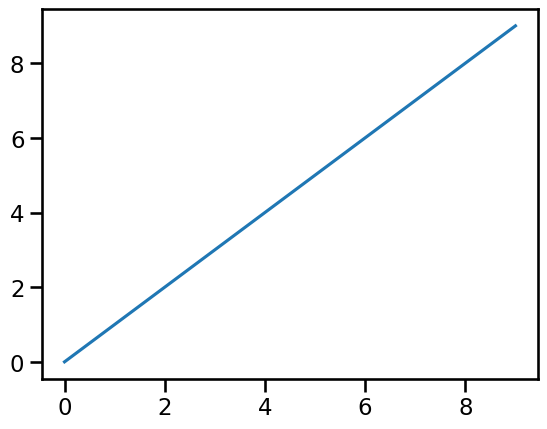

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('pandas1book')
sns.set_context('talk')
plt.plot(range(10))

In [65]:
(autos2
  .group_by('year')
  .agg(pl.col('comb08').mean(),
       pl.col('speeds').mean())
)

year,comb08,speeds
u16,f64,f64
2009,19.735642,5.389036
2014,23.531429,6.326758
2002,19.168205,4.568017
1990,19.000928,4.209108
1997,19.429134,4.382392
1985,19.808348,3.92475
1988,19.328319,4.129204
2018,25.019345,7.042373
2012,21.819444,5.911684


<Axes: xlabel='year'>

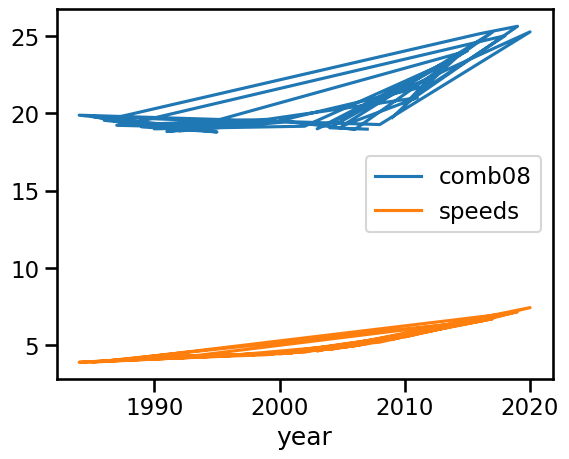

In [69]:
(autos2
  .group_by('year')
  .agg(pl.col('comb08').mean(),
       pl.col('speeds').mean())
 .to_pandas()
 .set_index('year')
 .plot()
)

<Axes: xlabel='year'>

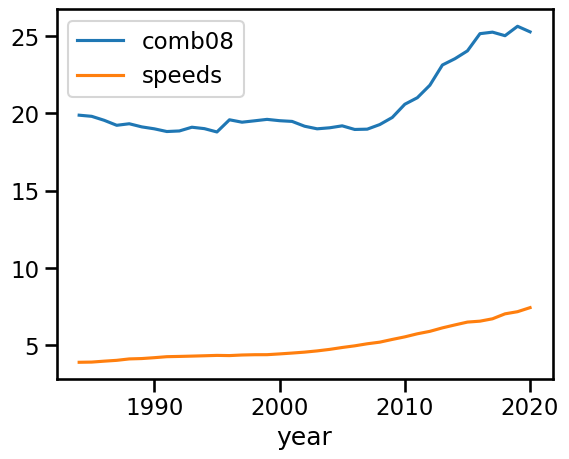

In [70]:
(autos2
  .group_by('year')
  .agg(pl.col('comb08').mean(),
       pl.col('speeds').mean())
 .to_pandas()
 .set_index('year')
 .sort_index()
 .plot()
)

<Axes: xlabel='year'>

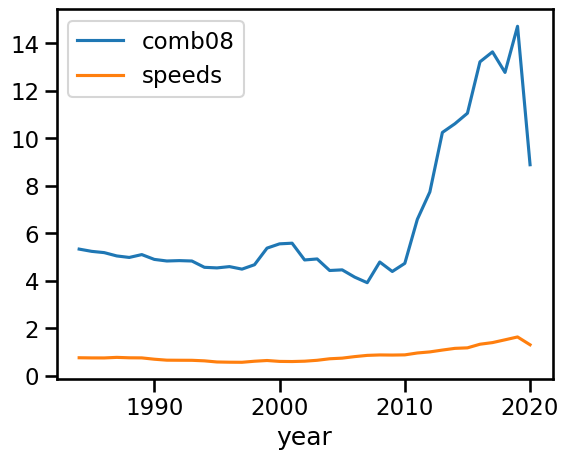

In [71]:
(autos2
  .group_by('year')
  .agg(pl.col('comb08').std(),
       pl.col('speeds').std())
 .to_pandas()
 .set_index('year')
 .sort_index()
 .plot()
)

In [72]:
pl.when?

In [78]:
#col.isa

In [81]:
#add country
(autos2
  .with_columns(pl.when(pl.col('make').cast(pl.Utf8).is_in(['Chevrolet','Ford','Dodge','GMC','Tesla']))
                .then('US')
                .otherwise('Other')
                .alias('country'))

)

/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_896/1814173283.py:4: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('US')`
  .then('US')
/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_896/1814173283.py:5: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('Other')`
  .otherwise('Other')


city08,comb08,highway08,cylinders,displ,drive,fuelCost08,make,model,range,createdOn,year,ffs,speeds,manual,country
u8,u8,u8,u8,u8,cat,u16,cat,cat,u16,"datetime[μs, America/New_York]",u16,bool,u8,bool,str
19,21,25,4,2,"""Rear-Wheel Dri…",2000,"""Alfa Romeo""","""Spider Veloce …",0,2013-01-01 00:00:00 EST,1985,true,5,true,"""Other"""
9,11,14,12,4,"""Rear-Wheel Dri…",3850,"""Ferrari""","""Testarossa""",0,2013-01-01 00:00:00 EST,1985,false,5,true,"""Other"""
23,27,33,4,2,"""Front-Wheel Dr…",1550,"""Dodge""","""Charger""",0,2013-01-01 00:00:00 EST,1985,true,5,true,"""US"""
10,11,12,8,5,"""Rear-Wheel Dri…",3850,"""Dodge""","""B150/B250 Wago…",0,2013-01-01 00:00:00 EST,1985,null,3,false,"""US"""
17,19,23,4,2,"""4-Wheel or All…",2700,"""Subaru""","""Legacy AWD Tur…",0,2013-01-01 00:00:00 EST,1993,true,5,true,"""Other"""
21,22,24,4,1,"""Front-Wheel Dr…",1900,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,3,false,"""Other"""
22,25,29,4,1,"""Front-Wheel Dr…",1700,"""Subaru""","""Loyale""",0,2013-01-01 00:00:00 EST,1993,true,5,true,"""Other"""
23,24,26,4,1,"""Front-Wheel Dr…",1750,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,3,false,"""Other"""
23,26,31,4,1,"""Front-Wheel Dr…",1600,"""Toyota""","""Corolla""",0,2013-01-01 00:00:00 EST,1993,true,5,true,"""Other"""


In [98]:
#need to convert back to utf8
(autos2
  .with_columns(pl.when(pl.col('make').cast(pl.Utf8).is_in(['Chevrolet','Ford','Dodge','GMC','Tesla']))
                .then('US')
                .otherwise('Other')
                .alias('country'))
  .group_by(['year','country'])
  .agg(pl.col('comb08').std(),
      pl.col('speeds').std())

)

/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_896/2354320072.py:4: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('US')`
  .then('US')
/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_896/2354320072.py:5: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('Other')`
  .otherwise('Other')


year,country,comb08,speeds
u16,str,f64,f64
1995,"""Other""",4.478537,0.589935
1999,"""Other""",4.361277,0.605757
2002,"""Other""",4.91984,0.620446
2007,"""Other""",4.009081,0.805998
2019,"""Other""",12.282856,1.448241
1986,"""US""",4.996816,0.667353
2003,"""Other""",5.089964,0.66178
2004,"""US""",3.410232,0.496562
2006,"""US""",3.296452,0.618034


/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_896/1277773914.py:4: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('US')`
  .then('US')
/var/folders/px/rv4mh3xn46z7059z336yx46r0000gn/T/ipykernel_896/1277773914.py:5: DeprecationWarning: in a future version, string input will be parsed as a column name rather than a string literal. To silence this warning, pass the input as an expression instead: `pl.lit('Other')`
  .otherwise('Other')


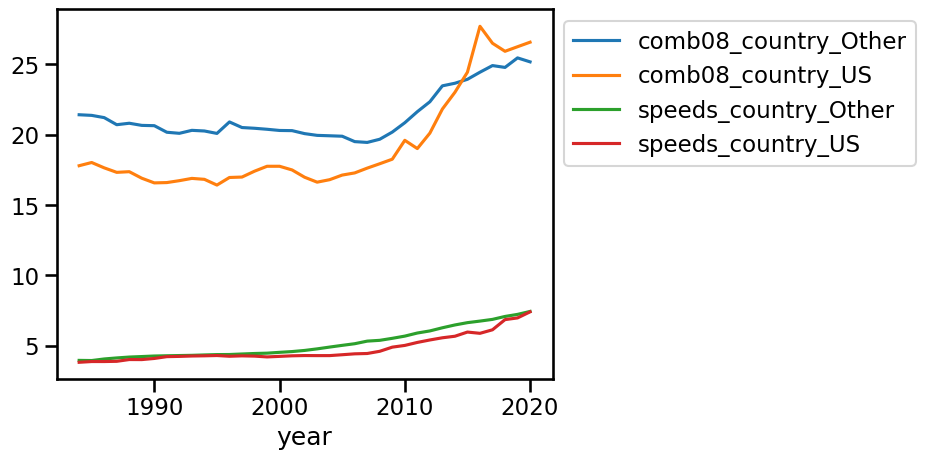

In [105]:
#use pivot
(autos2
  .with_columns(pl.when(pl.col('make').cast(pl.Utf8).is_in(['Chevrolet','Ford','Dodge','GMC','Tesla']))
                .then('US')
                .otherwise('Other')
                .alias('country'))
   .pivot(index='year', values=['comb08','speeds'],
         columns='country', aggregate_function='mean')
  .to_pandas()
  .set_index('year')
  .sort_index()
  .plot()
  .legend(bbox_to_anchor=(1,1))

)